1) Jeu vidéo : chargement de données

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# Lire les données

mydata = pd.read_csv ("vgsales.csv")

In [4]:
# Copier le dataset

df = mydata.copy()

In [ ]:
# Afficher les 5 premières lignes

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
# Utilisation des statistiques descriptives pour comprendre la distribution des ventes.

df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Travail à réaliser :

a) Un DataFrame est une structure de données bidimensionnelle fournie par la bibliothèque Pandas en Python. C'est l'équivalent d'une feuille de calcul Excel ou d'une table SQL. Il est utilisé pour manipuler, analyser et traiter des données organisées sous forme de lignes et de colonnes.

b) Caractéristiques principales d'un DataFrame :
- Colonnes : Chaque colonne peut contenir un type de données différent (int, float, string, etc.).
- Index : Les lignes sont indexées (numérotées ou nommées).
- Mutabilité : Les données dans un DataFrame peuvent être modifiées.
- Fonctions intégrées : Pandas fournit de nombreuses fonctions pour filtrer, agréger, visualiser et analyser les données.

In [7]:
# Question 2

# Affiche les types des colonnes
print(df.dtypes)

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


Analyse des types :

int64 : Données numériques entières (par exemple, Rank, Year).
float64 : Données numériques décimales (par exemple, Global_Sales).
object : Données textuelles ou chaînes de caractères (par exemple, Name, Platform, Genre).

In [ ]:
# Question c)

summary = df.describe()
print(summary)

               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  


Explication des variables :

count : Nombre de valeurs non nulles.
mean : Moyenne.
std : Écart-type.
min, max : Valeurs minimum et maximum.
25%, 50%, 75% : Quartiles (médiane incluse à 50%).

In [9]:
# Question d)

# Moyenne de la colonne "JP_Sales"
mean_jp_sales = df['JP_Sales'].mean()
print("Moyenne calculée avec mean():", mean_jp_sales)


Moyenne calculée avec mean(): 0.077781660441017


La valeur de la moyenne obtenue avec mean() est identique à celle affichée dans la colonne mean du tableau généré par la fonction describe().

Question e)

Pour identifier le genre de jeu le plus vendu, on peut regrouper les données par la colonne "Genre" et "Global_Sales".

In [14]:
# Identifier le genre le plus vendu

genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
# Afficher le tableau trié
print(genre_sales)

most_sold_genre = genre_sales.idxmax()

print("Genre le plus vendu :", most_sold_genre)


Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       392.20
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64
Genre le plus vendu : Action


Analyse :

La méthode groupby regroupe les données par le champ Genre.
sum() calcule la somme des ventes pour chaque genre.
idxmax() donne le genre ayant la somme la plus élevée.

Ainsi, on constate qu'en regroupant par "Genre", le genre "Action" est le plus vendu.


Pour trouver le pays ayant les meilleures ventes, on peut comparer les colonnes représentant les ventes par région (NA_Sales, EU_Sales, JP_Sales, et Other_Sales).

In [11]:
# Comparer les ventes par pays

regional_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
best_region = regional_sales.idxmax()
print("Pays/zone avec les meilleures ventes :", best_region)


Pays/zone avec les meilleures ventes : NA_Sales


Conclusion : les ventes Nord Américaine représente le plus de vente

Question g)

La variable "Year" représente l'année de sortie des jeux. Voici pourquoi elle peut contredire les hypothèses précédentes :

Genre le plus vendu :

Les genres populaires peuvent varier dans le temps. Par exemple, un genre dominant dans les années 2000 peut être dépassé par un autre dans les années 2010.
Si les données incluent des ventes cumulées, les jeux plus anciens (ayant eu plus de temps pour se vendre) auront un avantage sur les jeux récents.


Pays avec les meilleures ventes :

Les tendances de consommation évoluent. Par exemple, dans les années 1990, le Japon dominait le marché des jeux vidéo. Dans les années 2000, l'Amérique du Nord a pris le relais avec des consoles comme la Xbox.
Les jeux récents peuvent refléter des changements dans les parts de marché régionaux.

1.1) Notion de densité

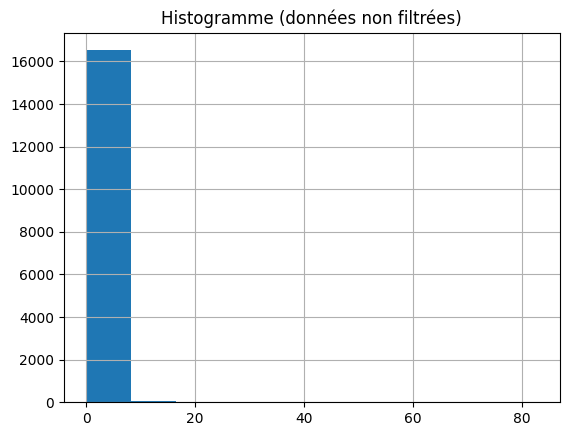

In [30]:
df["Global_Sales"].hist()
plt.title("Histogramme (données non filtrées)")
plt.show()

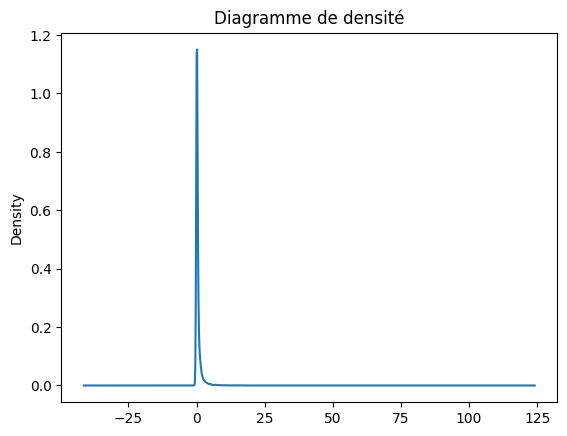

In [28]:
# Densité globale

df["Global_Sales"].plot(kind='density')
plt.title("Diagramme de densité")
plt.show()

Le souci avec cette histogramme ainsi que cette densité est qu'il y a un record de vente pour Nitendo sur une année précise, ce qui "fausse" l'histogramme.
On peut donc filtrer le dataset afin d'enlever cette valeur :

Données filtrées :
count    16266.000000
mean         0.386965
std          0.569666
min          0.010000
25%          0.060000
50%          0.160000
75%          0.450000
max          3.720000
Name: Global_Sales, dtype: float64


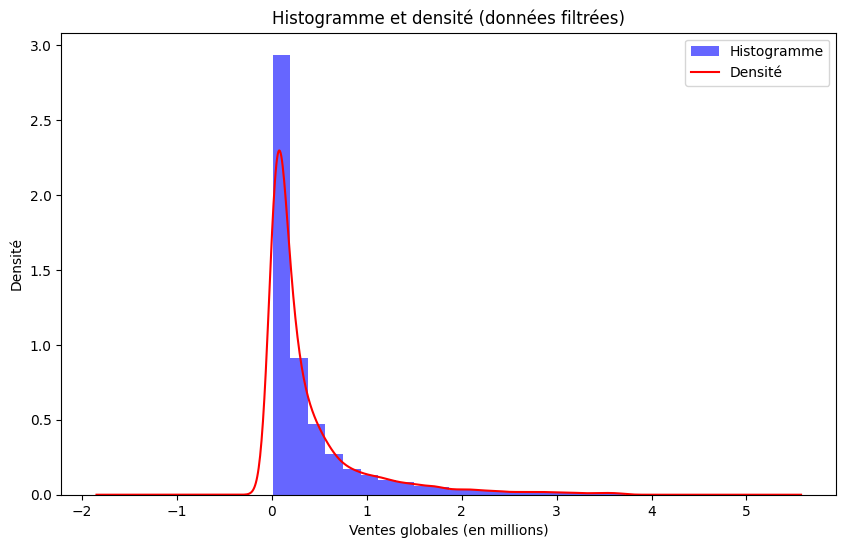

In [ ]:
# Défini un seuil en fonction du 98e percentile
valeur = 0.98 # On peut changer la valeur
threshold = df['Global_Sales'].quantile(valeur)

# Filtre les données en supprimant les valeurs supérieures au seuil
filtered_df = df[df['Global_Sales'] <= threshold]

# Affiche les données filtrées pour vérifier
print("Données filtrées :")
print(filtered_df['Global_Sales'].describe())

# Trace un histogramme et une densité avec les données filtrées
plt.figure(figsize=(10, 6))
filtered_df['Global_Sales'].plot(kind='hist', bins=20, density=True, alpha=0.6, color='blue', label='Histogramme')
filtered_df['Global_Sales'].plot(kind='kde', color='red', label='Densité')
plt.title("Histogramme et densité (données filtrées)")
plt.xlabel("Ventes globales (en millions)")
plt.ylabel("Densité")
plt.legend()
plt.show()


On remarque donc que l'histogramme est plus lissé / harmonisé sans cette valeur.

Le code ci-dessous
permet d’afficher les Global_Sales pour chaque année à l’aide de la fonction plot().

<Axes: xlabel='Year'>

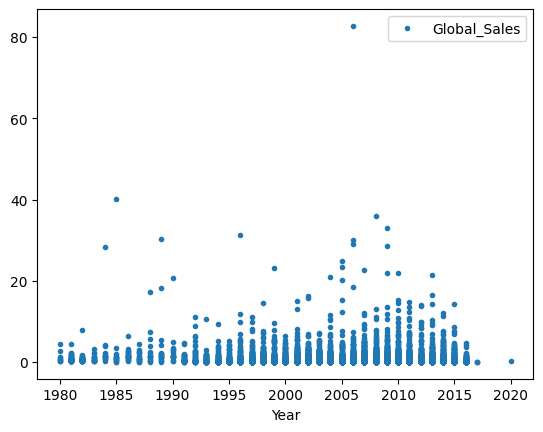

In [26]:
df_temp = df.set_index('Year', inplace=False)
df_temp ["Global_Sales"].plot(legend=True, marker='.', linestyle="none")

2 valeurs se démarquent. Nous allons les également les montrer de manière plus précise.

Année avec les ventes les plus élevées : 2008
Ventes globales pour cette année (en millions) : 678.9


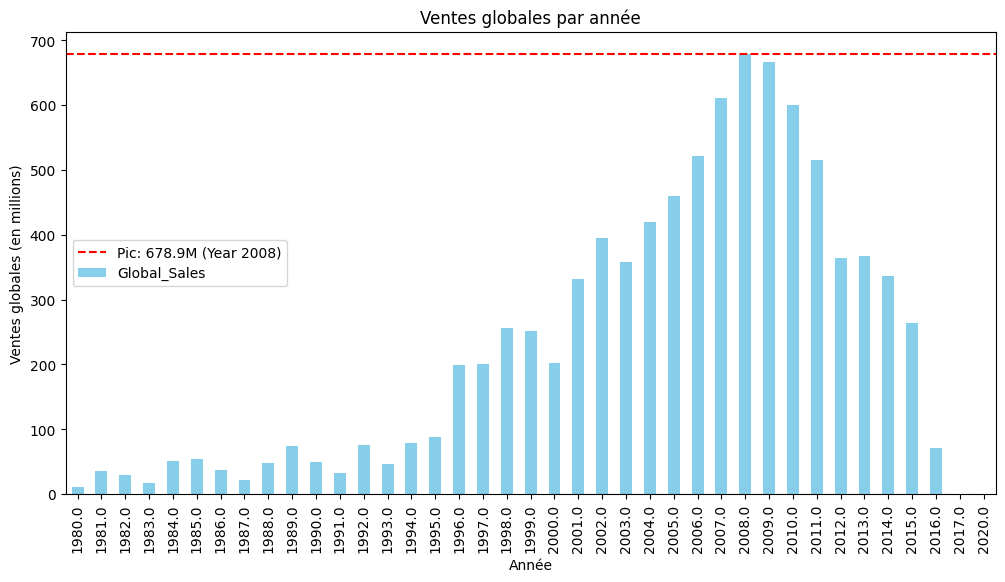

In [7]:
# On groupe les "Global Sales" par année
sales_by_year = df.groupby('Year')['Global_Sales'].sum()

# Trouve l'année avec les ventes les plus élevées
top_year = sales_by_year.idxmax()
top_sales = sales_by_year.max()

# Affiche les résultats
print("Année avec les ventes les plus élevées :", int(top_year))
print("Ventes globales pour cette année (en millions) :", top_sales)

# Trace les ventes globales par année pour visualiser la tendance
sales_by_year.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title("Ventes globales par année")
plt.xlabel("Année")
plt.ylabel("Ventes globales (en millions)")
plt.axhline(y=top_sales, color='red', linestyle='--', label=f'Pic: {top_sales}M (Year {int(top_year)})')
plt.legend()
plt.show()


a) 2008 est donc l'année qui se démarque avec une vente globale record qui a atteint les 678.9 millions de vente.
b) Les valeurs extrêmes, également appelées outliers, peuvent biaiser les résultats de plusieurs façons :

1) Effet disproportionné :

Une ou deux valeurs très élevées peuvent augmenter artificiellement des métriques comme la moyenne ou la somme totale, ce qui donne une image inexacte de la tendance générale. En effet, c'est ce que l'on a pu constater sur le graphique montrant la densité des "Global Sales" avant d'avoir éliminée les 2 plus grandes valeurs.

2) Masquage des tendances sous-jacentes :

Dans un nuage de points ou un histogramme, les valeurs extrêmes peuvent écraser la distribution principale, rendant difficile l'observation des variations normales.

3) Décisions erronées :

Les valeurs extrêmes peuvent conduire à des conclusions incorrectes, par exemple, en suggérant qu'une année ou une plateforme est beaucoup plus performante que les autres, alors que ce n'est qu'une exception. Le point ci est à surveiller particulièrement lorsqu'on entraîne un modèle de Machine / Deep Learning.

1.2) La variance

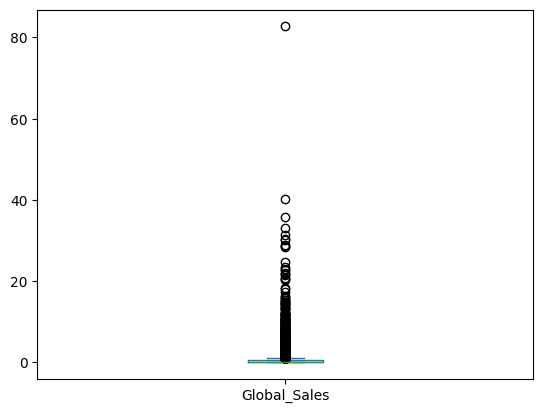

In [10]:
df["Global_Sales"].plot(kind='box')
plt.show()

<Axes: xlabel='Genre', ylabel='EU_Sales'>

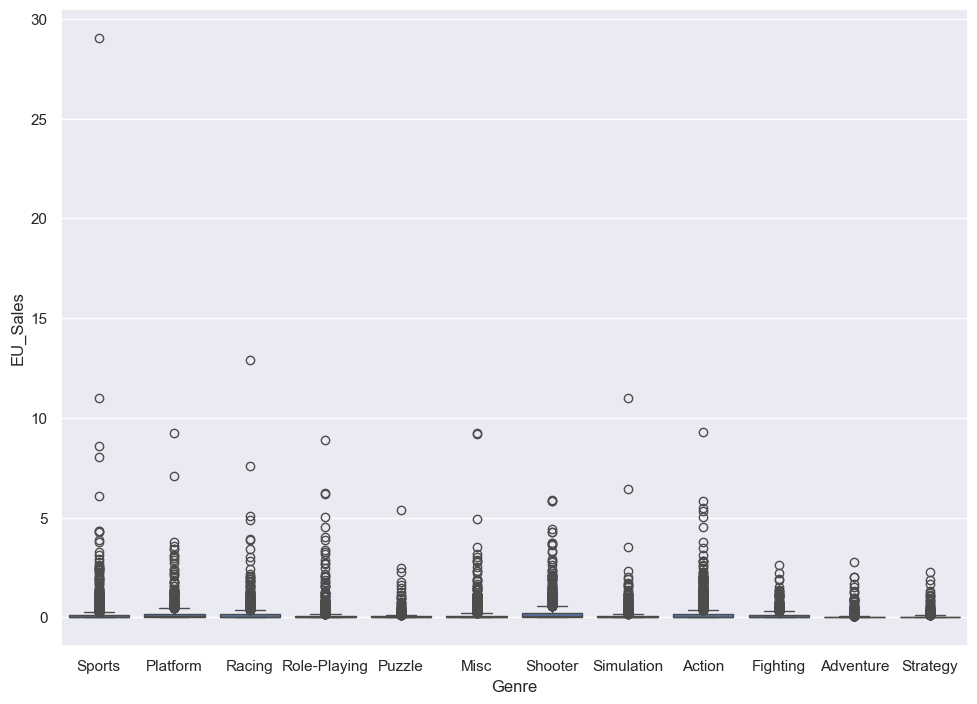

In [17]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.boxplot(x="Genre", y="EU_Sales", data=df)

a) La méthode boxplot() permet de représenter graphiquement la distribution d'une variable numérique en utilisant un diagramme en boîte. Elle met en évidence les éléments suivants :

Quartiles :

La boîte représente les données comprises entre le premier quartile (Q1, 25e percentile) et le troisième quartile (Q3, 75e percentile).
La ligne médiane dans la boîte correspond à la médiane (50e percentile).

Étendue interquartile :

C'est la différence entre Q3 et Q1 (Delta = Q3 - Q1), qui indique l'étendue centrale de la distribution.

"Whiskers" (moustaches) :

Elles s’étendent généralement jusqu'à 1.5 × Delta au-dessus de Q3 et en dessous de Q1.

Valeurs aberrantes :

Les points situés au-delà des whiskers sont identifiés comme des valeurs aberrantes potentielles.

b) Une valeur extrême peut perturber l’interprétation car :

Étendue des whiskers : Les whiskers sont calculés à partir de l'IQR, donc une valeur très éloignée des autres (outlier) ne sera pas incluse et apparaîtra comme un point isolé. Cela pourrait donner une impression exagérée de la présence de valeurs aberrantes.

Médiane : Si la distribution contient des valeurs extrêmes, elles peuvent affecter les calculs des quartiles et fausser l'interprétation de la médiane et de l'IQR.
Comparaison entre groupes : Dans des boxplots comparatifs (par exemple, genres), les valeurs extrêmes d'un groupe peuvent biaiser visuellement la comparaison avec d'autres groupes.

a) La notion de variance a été formalisée par Ronald A. Fisher, un statisticien britannique, dans les années 1920, dans le cadre de ses travaux sur la génétique et les statistiques.

b) L’écart-type est souvent plus parlant que la variance car l’écart-type est exprimé dans la même unité que les données d'origine, contrairement à la variance, qui est dans l’unité au carré. Par exemple, si les ventes sont mesurées en millions, l’écart-type est aussi en millions, ce qui le rend plus intuitif.

L'écart-type indique directement l'étendue typique autour de la moyenne. Par exemple, si l'écart-type est de 10, cela signifie que la plupart des valeurs se trouvent à ±10 de la moyenne.

c) La variance est essentielle pour caractériser une loi de probabilité car elle indique à quel point les valeurs d'une variable aléatoire s’écartent en moyenne de leur espérance mathématique (moyenne).
Elle influence la forme et la largeur de la distribution. Une faible variance signifie que les données sont concentrées autour de la moyenne, tandis qu'une variance élevée indique une dispersion importante.

In [ ]:
# Variance des jeux appartenant à la catégorie "Action" parmi les "Global_Sales"

df_gs_action = df["Global_Sales"][df["Genre"] == "Action"]
var = np.var(df_gs_action)

print("La variance des jeux de type Action est de :", var)

La variance des jeux de type Action est de : 1.336920636537983


In [ ]:
# Question a)

df_gs_action = df["Global_Sales"][df["Genre"] == "Sports"]
var = np.var(df_gs_action)

print("La variance des jeux de type Sport est de :", var)

La variance des jeux de type Sport est de : 4.365050995527384


La variance des deux genres reflète la dispersion des ventes globales dans chaque catégorie.

La variance concernant le genre Sport est significativement plus élevée, ce qui signifie que la catégorie Sports a des ventes globales très dispersées.
La variance pour Action est plus faible, ce qui indique que les ventes de cette catégorie sont plus homogènes (stabilité des ventes).

1.3) Un modèle dit "Gaussien"

Si p-value > 0.05, nous ne rejetons PAS l'hypothèse nulle (Ho) : les données suivent une distribution normale.
Si p-value ≤ 0.05, nous rejetons l'hypothèse nulle : les données ne suivent PAS une distribution normale.

In [29]:
# Test de shapiro pour le genre Aventure
shapiro_test_adventure = stats.shapiro(df["Global_Sales"][df["Genre"] == "Adventure"])

print(shapiro_test_adventure)

ShapiroResult(statistic=np.float64(0.30163591181548566), pvalue=np.float64(1.506676746057936e-56))


a) p-value est environ égal à 0, ainsi on rejète l'hypothèse nulle.

In [ ]:
# Test de shapiro le genre Strategy
shapiro_test_strategy = stats.shapiro(df["Global_Sales"][df["Genre"]== "Strategy"])

print(shapiro_test_strategy)

ShapiroResult(statistic=np.float64(0.4418881230551729), pvalue=np.float64(1.824581786038068e-41))


b) Comme pour les jeux d'aventure, p-value est environ égal à 0, ainsi on rejète l'hypothèse nulle. Ainsi les données pour les jeux de Stratégies de suivent pas une distribution normale.

c) Les valeurs obtenues sont inférieures à 0.05, alors les ventes globales ne suivent pas une distribution normale.

In [ ]:
# Question d)
# Test de Shapiro-Wilk sur toutes les ventes globales

shapiro_test_global_sales = stats.shapiro(df["Global_Sales"])

print("P-value pour toutes les ventes globales :", shapiro_test_global_sales)


P-value pour toutes les ventes globales : ShapiroResult(statistic=np.float64(0.2726659012978636), pvalue=np.float64(2.7686343674370784e-121))


c:\Users\ORDINATEUR\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16598.
  res = hypotest_fun_out(*samples, **kwds)


Sur les "Global_Sales", la p-value obtenu est bien inférieure à 0.05. Ainsi les données ne suivent pas une distribution normale. On peut faire le test de Shapiro sur tous les Genre afin d'avoir une idée plus précise sur chacun d'entre eux.

In [35]:
# Test de shapiro le genre Simulation
shapiro_test_simulation = stats.shapiro(df["Global_Sales"][df["Genre"]== "Simulation"])

print(shapiro_test_simulation)

ShapiroResult(statistic=np.float64(0.3038074373190346), pvalue=np.float64(5.8171807311991055e-49))


In [36]:
# Test de shapiro le genre Racing
shapiro_test_racing = stats.shapiro(df["Global_Sales"][df["Genre"]== "Racing"])

print(shapiro_test_racing)

ShapiroResult(statistic=np.float64(0.2827298127161574), pvalue=np.float64(2.001416957193007e-56))


In [37]:
# Test de shapiro le genre Platform
shapiro_test_platform = stats.shapiro(df["Global_Sales"][df["Genre"]== "Platform"])

print(shapiro_test_platform)

ShapiroResult(statistic=np.float64(0.31753195847412263), pvalue=np.float64(4.819743472176835e-49))


In [38]:
# Test de shapiro le genre Puzzle
shapiro_test_puzzle = stats.shapiro(df["Global_Sales"][df["Genre"]== "Puzzle"])

print(shapiro_test_puzzle)

ShapiroResult(statistic=np.float64(0.2051869274757918), pvalue=np.float64(5.763055853795091e-44))


In [39]:
# Test de shapiro le genre Role-Playing
shapiro_test_role_playing = stats.shapiro(df["Global_Sales"][df["Genre"]== "Role-Playing"])

print(shapiro_test_role_playing)

ShapiroResult(statistic=np.float64(0.32025647842561156), pvalue=np.float64(4.953740803071182e-59))


In [40]:
# Test de shapiro le genre Misc
shapiro_test_misc = stats.shapiro(df["Global_Sales"][df["Genre"]== "Misc"])

print(shapiro_test_misc)

ShapiroResult(statistic=np.float64(0.28310181619253727), pvalue=np.float64(2.9127408130147215e-63))


In [41]:
# Test de shapiro le genre Shooter
shapiro_test_shooter = stats.shapiro(df["Global_Sales"][df["Genre"]== "Shooter"])

print(shapiro_test_shooter)

ShapiroResult(statistic=np.float64(0.41025688850339626), pvalue=np.float64(4.9492066267518787e-54))


In [ ]:
# Test de shapiro le genre Puzzle
shapiro_test_puzzle = stats.shapiro(df["Global_Sales"][df["Genre"]== "Puzzle"])

print(shapiro_test_puzzle)

In [42]:
# Test de shapiro le genre Fighting
shapiro_test_fighting = stats.shapiro(df["Global_Sales"][df["Genre"]== "Fighting"])

print(shapiro_test_fighting)

ShapiroResult(statistic=np.float64(0.5096140515394751), pvalue=np.float64(3.13700848285017e-43))


e) Pour de grands échantillons (taille > 5000), le test de Shapiro-Wilk n’est pas recommandé. On peut utiliser le test de Kolmogorov-Smirnov (KS)

In [43]:
# Test KS sur toutes les ventes globales

stat_ks, p_ks = stats.kstest(df["Global_Sales"], 'norm', args=(df["Global_Sales"].mean(), df["Global_Sales"].std()))

print("P-value du test KS :", p_ks)


P-value du test KS : 0.0


On constate que la p-value est nulle. Ainsi comme pour le Test de Shapiro, si p-value est inférieur à 0.05, alors on rejète l'hypothèse H0. Les données ne suivent pas une distribution normale. On peut essayer de filtrer et de supprimer les très grandes valeurs qui "fausse" la densité :

In [53]:
valeur_for_KS = 0.95 # On peut changer la valeur
threshold_for_KS = df['Global_Sales'].quantile(valeur_for_KS)

# Filtre les données en supprimant les valeurs supérieures au seuil
filtered_df_for_KS = df[df['Global_Sales'] <= threshold_for_KS]

stat_ks_2, p_ks_2 = stats.kstest(filtered_df_for_KS["Global_Sales"], 'norm', args=(filtered_df_for_KS["Global_Sales"].mean(), filtered_df_for_KS["Global_Sales"].std()))

print("P-value du test KS :", p_ks_2)

P-value du test KS : 0.0


Le résultat est semblble au précédent.

f) Pour chaque genre, les p-values sont faibles (≤ 0.05). AInsi, les données ne suivent pas une distribution normale.

Et pour l'ensemble des données ,la p-value du test (Shapiro ou KS) est faible, cela confirme que les ventes globales pour tous les genres combinés ne suivent pas une distribution normale.

1.4) Time to decide

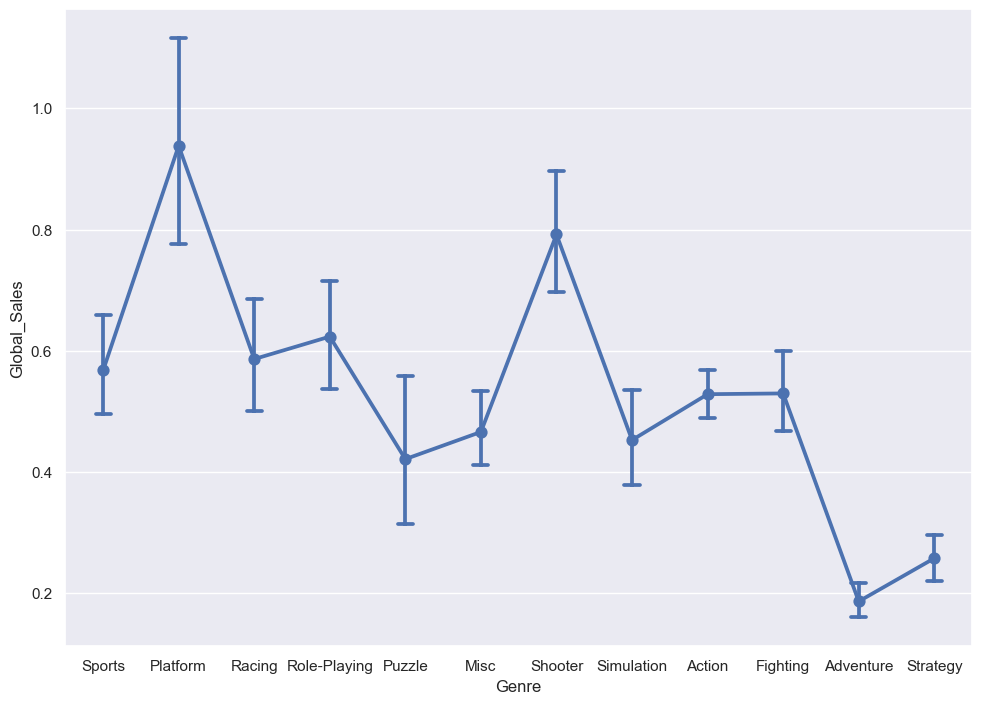

<Figure size 1170x827 with 0 Axes>

In [ ]:
# Moyenne et Intervalle de Confiance des "Global_Sales" pour chaque "Genre"
ax = sns.pointplot(x=df["Genre"], y=df["Global_Sales"], data=df, estimator=np.mean , capsize=.2)
plt.figure()
plt.show()

a)  L'intervalle de confiance pour une moyenne μ est donné par : IC=[μ−z*(σ/sqrt(n)), μ+z*(σ/sqrt(n))]

Où :

𝜇 est la moyenne de l'échantillon.
𝑧 est le score de confiance (par exemple, 𝑧 = 1.96, pour un niveau de confiance de 95%).
𝜎 est l'écart-type.
𝑛 est la taille de l'échantillon.

In [56]:
# Question b)

genre_mean_sales = df.groupby("Genre")["Global_Sales"].mean()
least_sold_genre = genre_mean_sales.idxmin()

print("Le genre", least_sold_genre, "a les ventes moyennes les plus faibles")

Le genre Adventure a les ventes moyennes les plus faibles


On peut le constater également sur le graphique avec "pointplot"

In [58]:
# Question c)

max_sold_genre = genre_mean_sales.idxmax()

print("Le genre", max_sold_genre, "a les ventes moyennes les plus élevés")

Le genre Platform a les ventes moyennes les plus élevés


In [59]:
# Question d)

best_selling_game = df.loc[df["Global_Sales"].idxmax()]

print("Jeu le mieux vendu :", best_selling_game["Name"])
print("Détails :", best_selling_game)

Jeu le mieux vendu : Wii Sports
Détails : Rank                     1
Name            Wii Sports
Platform               Wii
Year                2006.0
Genre               Sports
Publisher         Nintendo
NA_Sales             41.49
EU_Sales             29.02
JP_Sales              3.77
Other_Sales           8.46
Global_Sales         82.74
Name: 0, dtype: object


Ce jeu a été fait par Nitendo qui est un "blockbuster". EN effet, Nitendo est le "Publisher" faisant partie des outliers au niveau des ventes globales.
Ainsi Wii Sports a été un jeu extrêmement populaire.

In [65]:
# Question e)

df_2014 = df[df["Year"] >= 2014]

print(df_2014.head(), "\n")

total_rows = df_2014.shape[0]
print("Nombre total de jeu paru après 2024 est de :", total_rows)


    Rank                                       Name Platform    Year  \
33    34                  Call of Duty: Black Ops 3      PS4  2015.0   
44    45                         Grand Theft Auto V      PS4  2014.0   
49    50  Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS  2014.0   
77    78                                    FIFA 16      PS4  2015.0   
92    93               Star Wars Battlefront (2015)      PS4  2015.0   

           Genre             Publisher  NA_Sales  EU_Sales  JP_Sales  \
33       Shooter            Activision      5.77      5.81      0.35   
44        Action  Take-Two Interactive      3.80      5.81      0.36   
49  Role-Playing              Nintendo      4.23      3.37      3.08   
77        Sports       Electronic Arts      1.11      6.06      0.06   
92       Shooter       Electronic Arts      2.93      3.29      0.22   

    Other_Sales  Global_Sales  
33         2.31         14.24  
44         2.02         11.98  
49         0.65         11.33  
77    

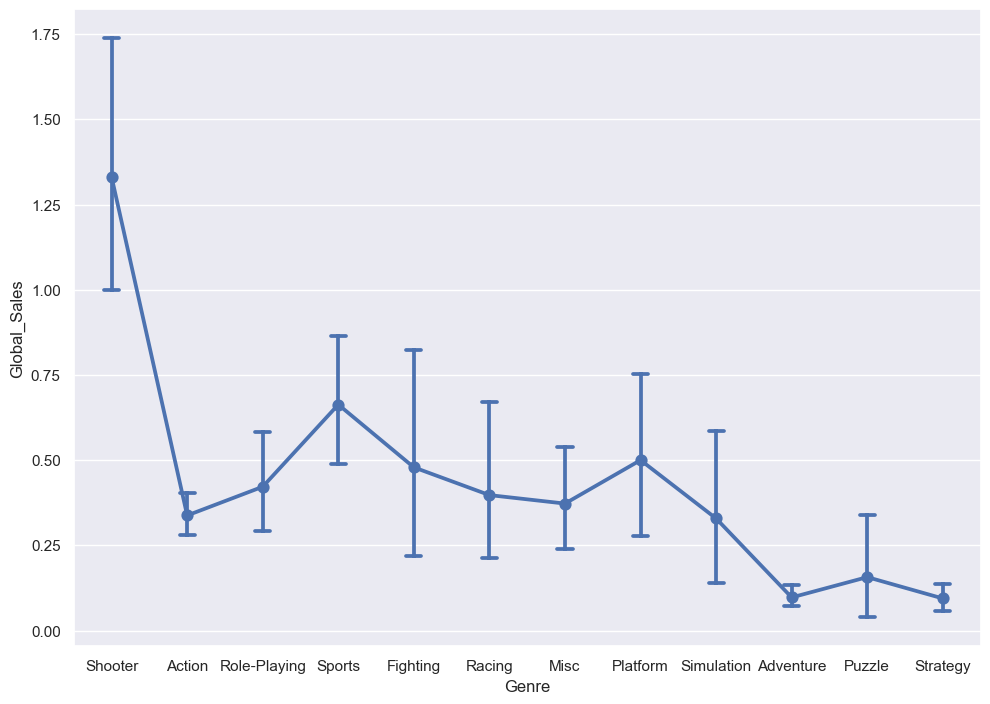

In [66]:
# Question f)

sns.pointplot(x="Genre", y="Global_Sales", data=df_2014, estimator=np.mean, capsize=0.2)
plt.show()

On constate que le Genre Shooter est le plus représenté (vendu) après 2014.

In [67]:
# Question g)

least_sold_genre_2014 = df_2014.groupby("Genre")["Global_Sales"].mean().idxmin()

print("Genre avec les ventes moyennes les plus faibles depuis 2014 :", least_sold_genre_2014)

Genre avec les ventes moyennes les plus faibles depuis 2014 : Strategy


In [68]:
# Question h)

max_sold_genre_2014 = df_2014.groupby("Genre")["Global_Sales"].mean().idxmax()

print("Genre avec les ventes moyennes les plus élevés depuis 2014 :", max_sold_genre_2014)

Genre avec les ventes moyennes les plus élevés depuis 2014 : Shooter


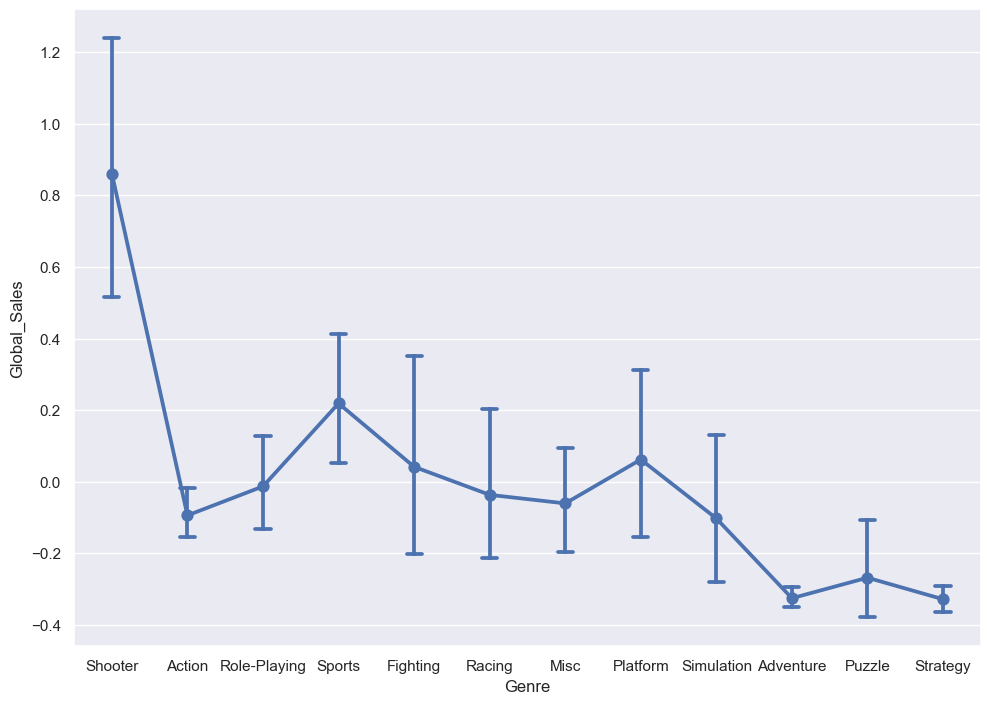

In [ ]:
# Question i)
# La mise à l'échelle facilite la comparaison des genres en neutralisant les différences d'échelles.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_2014_scaled = df_2014.copy() # On travaille sur une copie de df_2014 afin de ne pas modifier les données initiales
df_2014_scaled["Global_Sales"] = scaler.fit_transform(df_2014[["Global_Sales"]])

sns.pointplot(x="Genre", y="Global_Sales", data=df_2014_scaled, estimator=np.mean, capsize=0.2)
plt.show()


j) D'après le graphique avant et après centrage réduction sur les "Genres" de jeux vidéos des "Global_Sales", il est opportun d'aller dans les Genres de type "Shooter" et "Sports" car premièrement la moyenne est élevée, notamment pour "Shooter". Deuxièmement, l'intervalle de confiance est faible pour le Genre "Sports"

In [83]:
# Preuve

# Calcule la moyenne et l'écart-type par genre pour les "Genres" après 2024
genre_stats = df_2014_scaled.groupby("Genre")["Global_Sales"].agg(['mean', 'std']).reset_index()
#print(genre_stats.columns)

# Renommage les colonnes
genre_stats.rename(columns={'mean': 'Moyenne', 'std': 'Ecart_Type'}, inplace=True)

# Triage par Moyenne décroissante et Écart-Type croissant
genre_stats_sorted = genre_stats.sort_values(by=["Moyenne", "Ecart_Type"], ascending=[False, True])

print("Genres les plus populaires et prévisibles :")
print(genre_stats_sorted.head())




Genres les plus populaires et prévisibles :
           Genre   Moyenne  Ecart_Type
8        Shooter  0.861056    1.978375
10        Sports  0.218876    1.142135
4       Platform  0.062121    0.709286
2       Fighting  0.041767    1.155217
7   Role-Playing -0.012941    1.037739


In [73]:
# Question k)

platform_sales = df.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False)

print(platform_sales)

Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
PS       730.66
GBA      318.50
PSP      296.28
PS4      278.10
PC       258.82
XB       258.26
GB       255.45
NES      251.07
3DS      247.46
N64      218.88
SNES     200.05
GC       199.36
XOne     141.06
2600      97.08
WiiU      81.86
PSV       61.93
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64


La Plateforme PS2 est la plus représentée.

In [78]:
region_sales = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum().sort_values(ascending=False)

print(region_sales)


NA_Sales       4392.95
EU_Sales       2434.13
JP_Sales       1291.02
Other_Sales     797.75
dtype: float64


Il est préférable de lancer le jeu sur le continent Américain.

m) Pour conclure,

On a remarqué que les jeux de tirs sont préférés aux autres et ont un franc succès avec une moyenne de 1.33 millions de ventes. De plus, la plateforme PS2 qui arrive en tête avec un nombre total de ventes atteignant 1255.64. Les jeux de tirs sont également appréciés du public et notamment après 2014, ce qui les place en tête du classement.
Le continent Nord Américain rescence la part de marché la plus importante avec 4392.95 millions de ventes.

Il est aussi important de noter que la catégorie "Sports" arrive pas très loin derrière les jeux de tirs en raison d'une valeur "Outliers" réalisée par la société "Nitendo".